<a href="https://colab.research.google.com/github/PintoPaola/Inteligencia-Artificial/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [419]:
import os
import numpy as np
from matplotlib import pyplot

In [420]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [421]:
# Leer datos
data = np.loadtxt('/content/gdrive/MyDrive/IA/DATASET/elevator.csv', delimiter=',')
X, y = data[:, :7], data[:,7]
m = y.size

In [422]:
X.shape

(15000, 7)

mejora el rendimiento y la estabilidad de los algoritmos

In [423]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [424]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[9.37440000e+01 7.39990000e+01 1.67743000e+02 ... 1.26682793e+00
  8.78793754e+03 5.47585200e+03]
 [9.37400000e+01 7.39990000e+01 1.67739000e+02 ... 1.26677387e+00
  8.78718760e+03 5.47585200e+03]
 [9.37360000e+01 7.39980000e+01 1.67734000e+02 ... 1.26673694e+00
  8.78643770e+03 5.47570400e+03]
 ...
 [6.41940000e+01 7.40480000e+01 1.38242000e+02 ... 8.66924157e-01
  4.12086964e+03 5.48310630e+03]
 [6.41950000e+01 7.40490000e+01 1.38244000e+02 ... 8.66925954e-01
  4.12099802e+03 5.48325440e+03]
 [6.41950000e+01 7.40490000e+01 1.38244000e+02 ... 8.66925954e-01
  4.12099802e+03 5.48325440e+03]]
Media calculada: [7.45100015e+01 7.30678575e+01 1.47577859e+02 1.44214400e+00
 1.01980245e+00 5.62657254e+03 5.33915786e+03]
Desviación estandar calculada: [8.65056137e+00 4.96041685e-01 8.65350633e+00 8.67602253e+00
 1.18013558e-01 1.32268880e+03 7.25794474e+01]
[[ 2.22343934  1.8771456   2.33028557 ...  2.0931958   2.39010492
   1.88337255]
 [ 2.22297694  1.8771456   2.32982333 ...  2.09273776  

In [425]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

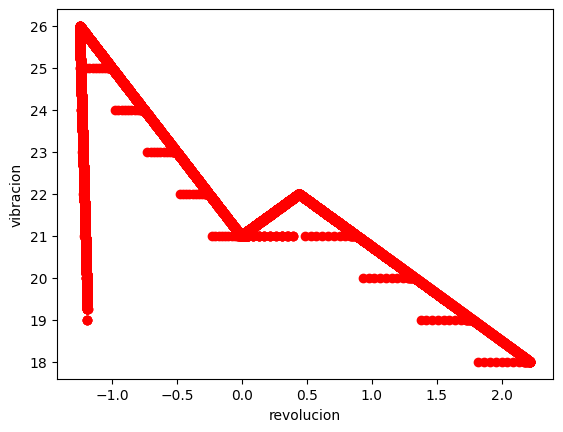

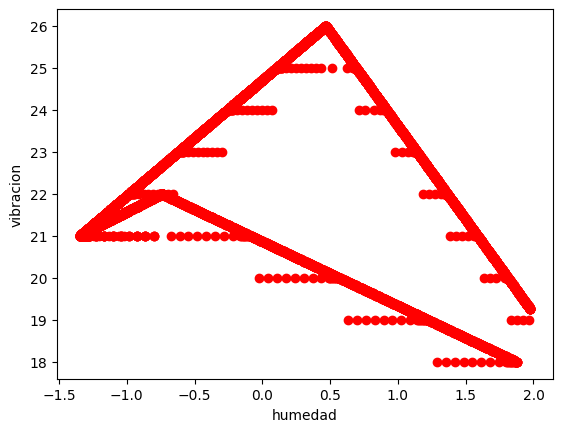

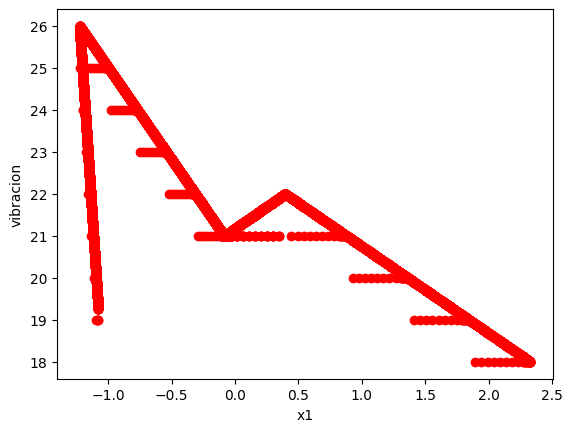

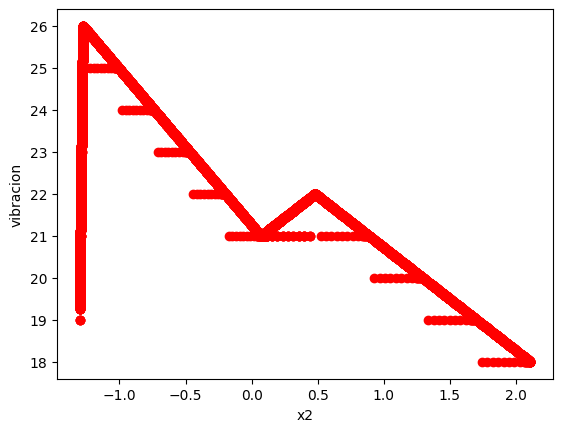

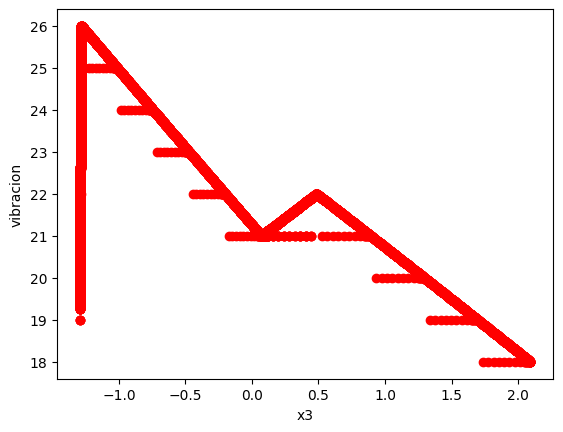

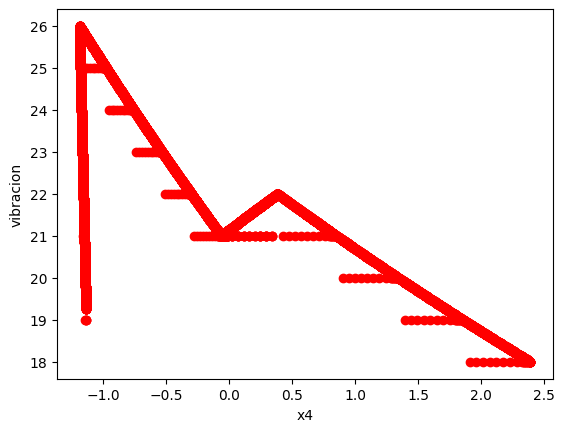

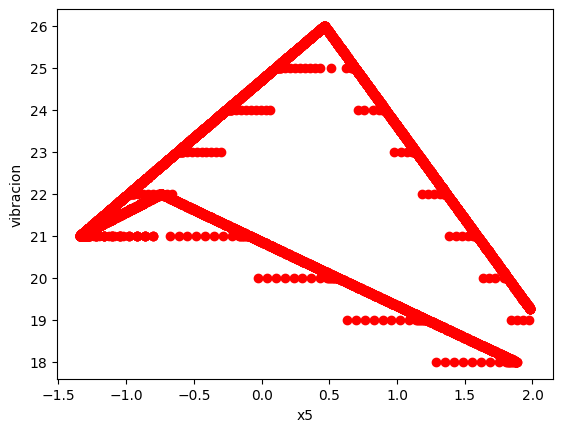

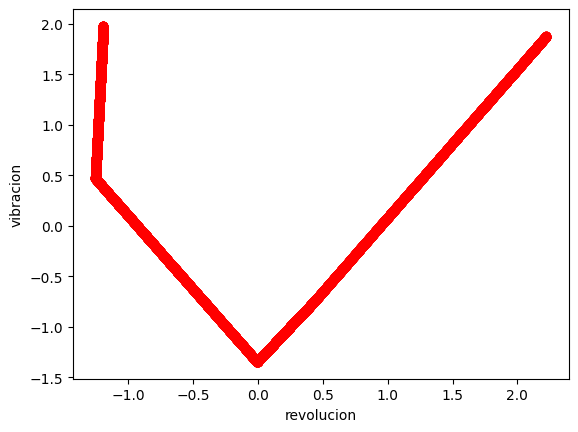

In [426]:
xlabel1 = "revolucion"
xlabel2 = "humedad"
xlabel3 = "x1"
xlabel4 = "x2"
xlabel5 = "x3"
xlabel6 = "x4"
xlabel7 = "x5"
ylabel1 = "vibracion"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y, xlabel7, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, ylabel1)

In [427]:
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [428]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [448]:
min_value = 0
max_value = 1

# Generar valores aleatorios dentro del rango para cada elemento de theta
theta = np.random.uniform(min_value, max_value, size=8)
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.75679106 0.03956451 0.53991665 0.90919756 0.26839305 0.72811027
 0.8413397  0.79298821] se obtiene un costo de: 233.5098637435233


In [449]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [21.85227236 -0.30802074 -0.19440477 -0.3190597  -0.29600193 -0.32279041
 -0.20168248 -0.22019767]
con un costo de: 0.6273893779381884 


Text(0, 0.5, 'Costo J')

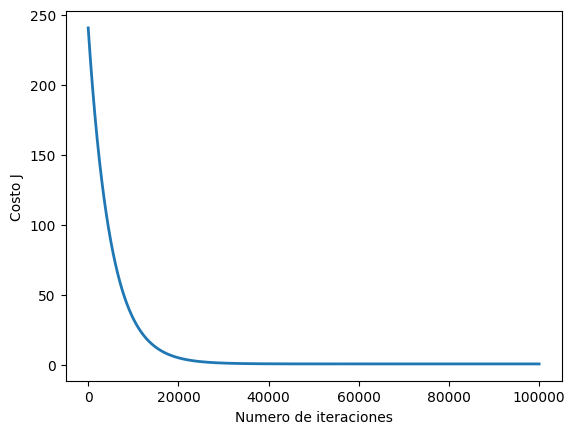

In [431]:
theta = np.zeros(8)

num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

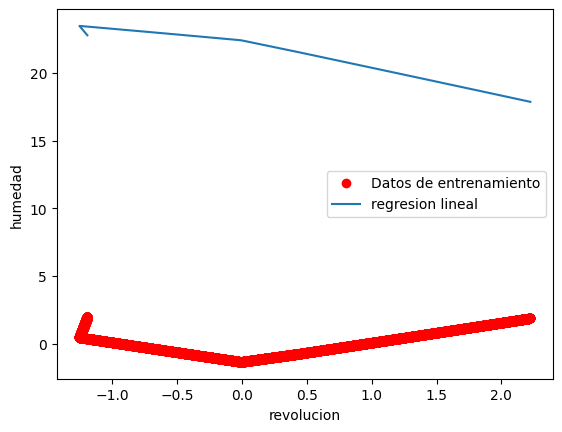

In [432]:

graficarDatos(X_ready[:, 1], X_ready[:, 7], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [433]:

y_pred = np.dot([1,64.35,74.269,138.619,-9.919,0.86644495,4140.9225,5515.884361], theta)
print(y_pred)

-2103.7149067372275


In [434]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [435]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [436]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [-2.66681538e+04 -1.37809738e+03 -3.83054433e+02  1.24015772e+03
  1.26145233e+02  5.51322367e+02  2.84822507e-02 -4.97518544e+00]


In [437]:
X_array = [1,64.35,74.269,138.619,-9.919,0.86644495,4140.9225,5515.884361]
vibracion = np.dot(X_array, theta)

print('vibracion (usando la ecuación de la normal): {:.0f}'.format(vibracion))

vibracion (usando la ecuación de la normal): 13
